In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/datas/airport-codes.csv')
df.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57421 entries, 0 to 57420
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         57421 non-null  object 
 1   type          57421 non-null  object 
 2   name          57421 non-null  object 
 3   elevation_ft  49608 non-null  float64
 4   continent     28978 non-null  object 
 5   iso_country   57175 non-null  object 
 6   iso_region    57421 non-null  object 
 7   municipality  51527 non-null  object 
 8   gps_code      41561 non-null  object 
 9   iata_code     9225 non-null   object 
 10  local_code    30030 non-null  object 
 11  coordinates   57421 non-null  object 
dtypes: float64(1), object(11)
memory usage: 5.3+ MB


In [245]:
df['type'].value_counts()

small_airport     34808
heliport          12028
medium_airport     4537
closed             4378
seaplane_base      1030
large_airport       616
balloonport          24
Name: type, dtype: int64

Since there's not much data it would be better to over sample it later in the preprocess stage

In [246]:
df.isnull().sum()

ident               0
type                0
name                0
elevation_ft     7813
continent       28443
iso_country       246
iso_region          0
municipality     5894
gps_code        15860
iata_code       48196
local_code      27391
coordinates         0
dtype: int64

# Data Wrangling

In [247]:
df[['ISO_Country','ISO_state']] = df['iso_region'].str.split('-',n=1, expand=True)

Since we made a new column for iso_region, we can dop these columns

In [248]:
df.drop(['iso_country','iso_region'], axis= 1, inplace=True)

In [249]:
df.head()

,ident,type,name,elevation_ft,continent,municipality,gps_code,iata_code,local_code,coordinates,ISO_Country,ISO_state
0,00A,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125",US,PA
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022",US,KS
2,00AK,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968",US,AK
3,00AL,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172",US,AL
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,NaN,"-91.254898, 35.6087",US,AR


we would have to do the same for coordination

In [250]:
def split_clean_coordinate(long,lang,co):
    df[[long,lang]] = df[co].str.split(',',n=1,expand=True)
    df.drop([co],axis=1,inplace=True)
    df[long] = df[long].astype(float)
    df[lang] = df[lang].astype(float)

In [251]:
split_clean_coordinate('Longitude','Latitude','coordinates')

Now that I changes Longitude and Latitude we can do further analysis by using correlation in the EDA section

In [252]:
df.isnull().sum()

ident               0
type                0
name                0
elevation_ft     7813
continent       28443
municipality     5894
gps_code        15860
iata_code       48196
local_code      27391
ISO_Country         0
ISO_state           0
Longitude           0
Latitude            0
dtype: int64

In [253]:
df.rename(columns = {'ISO_Country': 'Country' ,'ISO_state':'State'}, inplace =True)

Since we already have coordinates and the state names, we dont need iata code which is the location identification code.

In [254]:
df.drop(['iata_code'], axis = 1, inplace=True)

In [255]:
df.head()

,ident,type,name,elevation_ft,continent,municipality,gps_code,local_code,Country,State,Longitude,Latitude
0,00A,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,00A,US,PA,-74.933601,40.070801
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,00AA,US,KS,-101.473911,38.704022
2,00AK,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,00AK,US,AK,-151.695999,59.949200
3,00AL,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,00AL,US,AL,-86.770302,34.864799
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,US,AR,-91.254898,35.608700


In [256]:
df['ident'].value_counts()

LOLS    1
LZJS    1
FAST    1
TA23    1
EHBK    1
       ..
KFSU    1
SWON    1
EPZP    1
KDVN    1
MI43    1
Name: ident, Length: 57421, dtype: int64

we can see that ident is a primary key column so we can drop that as well. 

In [257]:
df.drop(['ident'], axis = 1, inplace=True)

In [258]:
df.head()

,type,name,elevation_ft,continent,municipality,gps_code,local_code,Country,State,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,00A,US,PA,-74.933601,40.070801
1,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,00AA,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,00AK,US,AK,-151.695999,59.949200
3,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,00AL,US,AL,-86.770302,34.864799
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,US,AR,-91.254898,35.608700


lets try to fill up NA values

But first, I want to visualize how their elevation feets are like.

<AxesSubplot:xlabel='type', ylabel='elevation_ft'>

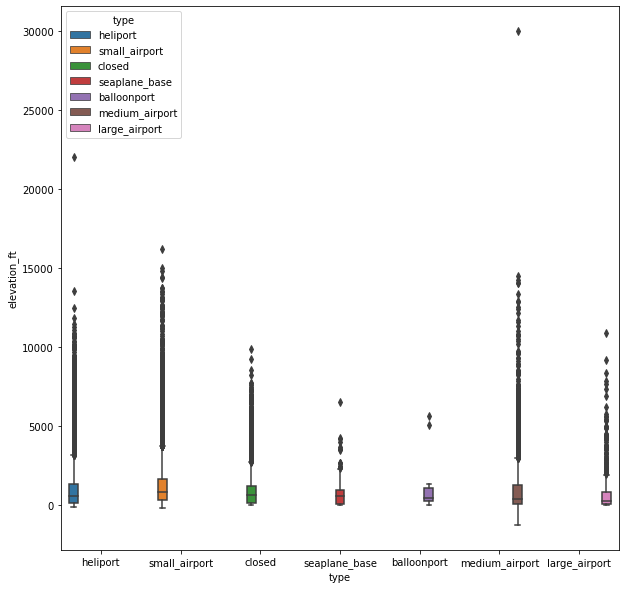

In [259]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'type', y = 'elevation_ft', data =df, hue = 'type')

In [260]:
df['type'].unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

Let's drop the value that has closed. Closed airports aren't useful for our future analysis.

In [261]:
df.drop(df[df['type'] == 'closed'].index, inplace = True)

In [262]:
data_input = ['heliport', 'small_airport', 'seaplane_base', 'balloonport', 'medium_airport', 'large_airport']

In [263]:
def plot_mean_type(data, airport_types):
    mean_list = []
    for airport_type in airport_types:
        type_mean = np.mean(data[data['type'] == airport_type]['elevation_ft'])
        mean_list.append(type_mean)
    mean_df = pd.DataFrame({'mean_type_airport': mean_list}, index=data_input)
    return mean_df

In [264]:
mean_df_f = plot_mean_type(df, data_input)
mean_df_f

,mean_type_airport
heliport,1199.377100
small_airport,1349.811397
seaplane_base,649.716329
balloonport,1089.000000
medium_airport,1059.199724
large_airport,798.062295


In [265]:
mean_df_f.mean_type_airport

heliport          1199.377100
small_airport     1349.811397
seaplane_base      649.716329
balloonport       1089.000000
medium_airport    1059.199724
large_airport      798.062295
Name: mean_type_airport, dtype: float64

<AxesSubplot:ylabel='mean_type_airport'>

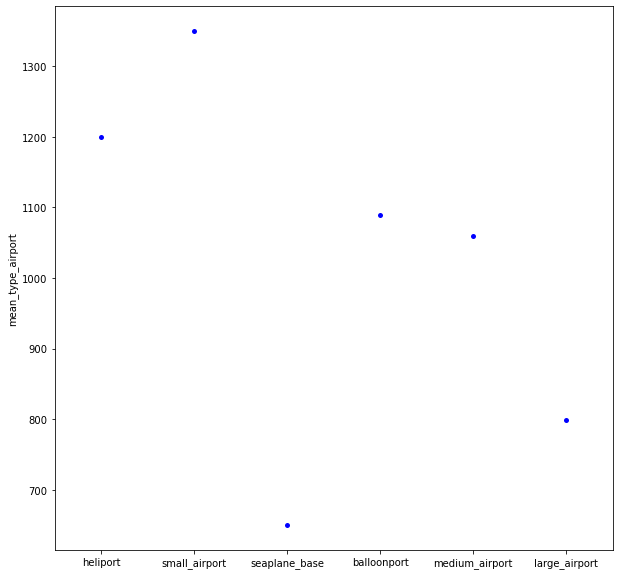

In [266]:
plt.figure(figsize=(10,10))
sns.swarmplot(x = mean_df_f.index, y = mean_df_f.mean_type_airport, data= mean_df_f, color ='b')

We can see the small airport has the most highest mean value for elevation in feet. 

The large airport and seaplane base has the smallest mean value. In further analysis, we will figure out the correlation and the deep feature analysis.

In [267]:
mean_df_f = plot_mean_type(df, data_input)
mean_df_f = mean_df_f.reset_index()
mean_df_f

,index,mean_type_airport
0,heliport,1199.377100
1,small_airport,1349.811397
2,seaplane_base,649.716329
3,balloonport,1089.000000
4,medium_airport,1059.199724
5,large_airport,798.062295


In [268]:
mean_df_f.columns = ['airport','mean_']
mean_df_f

,airport,mean_
0,heliport,1199.377100
1,small_airport,1349.811397
2,seaplane_base,649.716329
3,balloonport,1089.000000
4,medium_airport,1059.199724
5,large_airport,798.062295


In [269]:
df['elevation_ft'] = df['elevation_ft'].fillna(111)

def filling_na(type_airport, val):
    b = df['type']==type_airport
    df.loc[b,'elevation_ft'] = df.loc[b,'elevation_ft'].replace(111,val)

In [270]:
def fill_all_type(data):
    for i in range(len(data)):
        filling_na(data.airport[i], data.mean_[i])

In [271]:
fill_all_type(mean_df_f)

We fill up all the NA values with 111 first. Then we replace 111 with with the mean values for each type of airports.

We can see that the elevation feet has no more null values. Let's continue to explore more for others

<AxesSubplot:xlabel='type', ylabel='elevation_ft'>

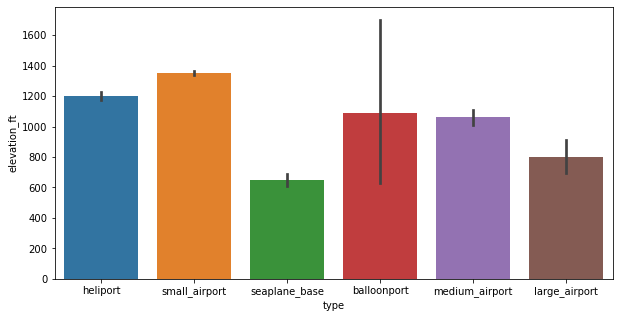

In [272]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'type', y = 'elevation_ft', data = df)

We see that small_airport has the highest elevation feet and balloonport has a huge range of confidence interval. Small_airport might have a bigger range than other airports because of it's outliers. Therefore, it's better to visualize with other types of graphs instead of a boxplot. 

But first, let's focus on filling up Na values first.

In [273]:
df['continent'].value_counts()

SA    8212
EU    7404
AS    5363
AF    3283
OC    3008
AN      26
Name: continent, dtype: int64

In [274]:
print(len(df['gps_code'].unique()))
print(len(df['local_code'].unique()))

40103
28133


gps_cood and loca_code aren't really useful. We can drop these columns.

If I label encode thse in the future, there owuld be too many columns

In [275]:
df.drop(['gps_code','local_code'], axis= 1, inplace =True)

In [276]:
df.head()

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NaN,Bensalem,US,PA,-74.933601,40.070801
1,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NaN,Anchor Point,US,AK,-151.695999,59.949200
3,small_airport,Epps Airpark,820.0,NaN,Harvest,US,AL,-86.770302,34.864799
5,small_airport,Fulton Airport,1100.0,NaN,Alex,US,OK,-97.818019,34.942803


So all the US has missing values with NaN.

In [277]:
df['continent'].fillna('A',inplace=True)

In [278]:
def fill_continent(country, continent):
    country_data = df['Country'] == country
    df.loc[country_data,'continent'] = df.loc[country_data,'continent'].replace('A', continent)

I filled up NAs with A (temporarily)

And filled up all the country matching their appropriate continent. 

In [279]:
fill_continent('US', 'NA')
fill_continent('CA', 'NA')
fill_continent('MX', 'NA')
fill_continent('CU', 'NA')
fill_continent('CR', 'NA')
fill_continent('GL', 'NA')
fill_continent('HN', 'CA')

In [280]:
df['continent'].value_counts()

NA    25148
SA     8212
EU     7404
AS     5363
AF     3283
OC     3008
A       446
CA      153
AN       26
Name: continent, dtype: int64

We changed all the A to NA - North America.

And other countries and continents as well

While I'm filling up the data I found that there's a country labeled as PA which I would have to drop this since it is a data error.

There are other countries that can be labeled into certain continents but since there's not even 100 data for each of the countries, I will drop all of them.

In [281]:
df[df['continent'] == 'A']['Country'].value_counts()

PA    69
BS    61
PR    56
GT    52
DO    34
NI    32
SV    25
BZ    24
JM    19
VI     9
HT     8
TC     8
GP     6
VC     5
VG     4
KY     3
BQ     3
TT     3
AG     3
LC     2
BB     2
GD     2
DM     2
PM     2
KN     2
MF     2
MS     1
MQ     1
BM     1
AW     1
BL     1
AI     1
SX     1
CW     1
Name: Country, dtype: int64

In [282]:
df_2 = df[df.continent != 'A']
df_2.head()

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.933601,40.070801
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999,59.949200
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.770302,34.864799
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.818019,34.942803


In [283]:
#Also, for the State column, there are some Statesthat has '-' and other special characters.
#We have to get rid of this

import re
df['State'] = df['State'].apply(lambda x: re.sub('-', '', x))

<AxesSubplot:>

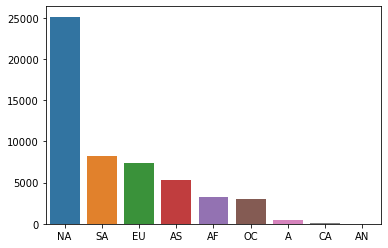

In [284]:
sns.barplot(x = df.continent.value_counts().index, y = df.continent.value_counts().values, data=df)

We have so much values for NA's. I guess most of the airports are densed in North America.

In [285]:
df.head()

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.933601,40.070801
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999,59.949200
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.770302,34.864799
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.818019,34.942803


<AxesSubplot:xlabel='type', ylabel='elevation_ft'>

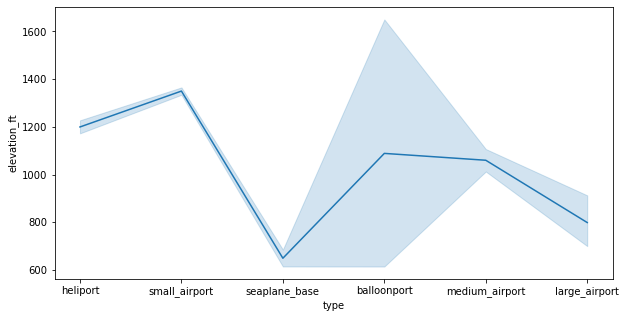

In [286]:
plt.figure(figsize=(10,5))
sns.lineplot(x= 'type' , y = 'elevation_ft', data= df)

line plot shows the relationship between elevation_ft for each type of airports. But oddly, it has a different result when I plot it with the catplot underneath.

<Figure size 1080x288 with 0 Axes>

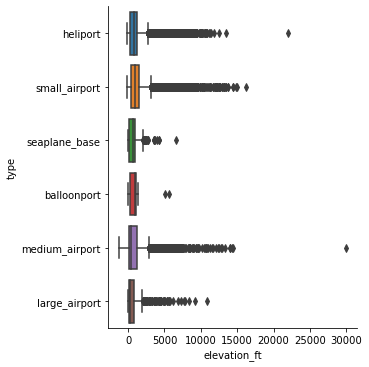

In [287]:
plt.figure(figsize=(15,4))
sns.catplot(data=df, x="elevation_ft", y="type", kind="box")

I can see outliers in this horizontal boxplot. Let's see more.

In [288]:
df[df['elevation_ft'] > 25000]

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
55049,medium_airport,Modi,29977.0,NA,California,US,CA,179.999894,89.999845


The elevation_ft 29977.0 is an outlier because according to google, 
The Leadville Airport is North America's highest public use airport at an altitude of 9,934 feet.

Hence, we don't drop this row.

I can not find anything about the elevation feet for modi airport. So I will drop this.

In [289]:
df.drop([55049], axis=0, inplace=True)

In [290]:
df[df['elevation_ft'] > 20000]

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
25164,heliport,Siachen Glacier AFS Airport,22000.0,AS,NaN,IN,JK,77.0,35.5


This isn't an outlier. It's a fact

In [291]:
df.head()

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.933601,40.070801
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999,59.949200
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.770302,34.864799
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.818019,34.942803


In [292]:
def describe(data, col):
    max_v = data[col].max()
    min_v = data[col].min()
    median_v = data[col].median()
    mean_v = data[col].mean()
    return "Max: {}".format(max_v), "Min: {}".format(min_v), "Median: {}".format(median_v), "Mean: {}".format(mean_v)
    

In [293]:
describe(df,'elevation_ft')

('Max: 22000.0', 'Min: -1266.0', 'Median: 879.0', 'Mean: 1270.574942247642')

In [294]:
below_avg = []
above_avg = []
for val in df['elevation_ft']:
    if val > 1231:
        above_avg.append(val)
    else:
        below_avg.append(val)

In [295]:
print(len(below_avg))
len(above_avg)

34376


18666

Seems like people build airports in lower elevated place than higher. Why is this?

In [296]:
df['Longitude'].astype(str).astype(float)
df['Latitude'].astype(str).astype(float)

0        40.070801
1        38.704022
2        59.949200
3        34.864799
5        34.942803
           ...    
57416    40.542524
57417    41.784401
57418    51.894444
57419   -11.584278
57420    30.784722
Name: Latitude, Length: 53042, dtype: float64

In [297]:
df.isnull().sum()

type               0
name               0
elevation_ft       0
continent          0
municipality    5237
Country            0
State              0
Longitude          0
Latitude           0
dtype: int64

Not an outlier

In [298]:
df[df['municipality'].isnull()]

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
1550,heliport,Watertown / Brownlee Heliport,1720.000000,NA,NaN,US,SD,-97.108090,44.883265
2459,heliport,Nordman / Phillabaum Heliport,2440.000000,NA,NaN,US,ID,-116.871175,48.631483
4417,seaplane_base,Peru / Destiny Cove SPB,580.000000,NA,NaN,US,ME,-70.396957,44.460597
7690,small_airport,Zadow Airstrip,1349.811397,NA,NaN,US,TX,-95.954354,29.991739
7926,small_airport,Gun Barrel City Airpark,385.000000,NA,NaN,US,TX,-96.145665,32.355150
...,...,...,...,...,...,...,...,...,...
57358,small_airport,Sengwa Research Area Airstrip,1349.811397,AF,NaN,ZW,MN,28.215618,-18.165196
57359,small_airport,Gokwe North Airport,1349.811397,AF,NaN,ZW,MI,28.330871,-17.537114
57362,small_airport,Chipinge Farm Airstrip,1349.811397,AF,NaN,ZW,MV,32.203607,-20.460575
57363,small_airport,Turwi River Airstrip,1349.811397,AF,NaN,ZW,MV,32.109040,-20.395009


In [299]:
ar_1 = df['municipality'].value_counts().values

In [300]:
z=0
for i in ar_1:
    if i == 1:
        z+= 1
z       

19741

19741 unique values are identified.

In [301]:
df.drop(['name','municipality'], axis=1, inplace = True)

There are too many unqiue values for municipality column.

In [302]:
df.head()

,type,elevation_ft,continent,Country,State,Longitude,Latitude
0,heliport,11.0,NA,US,PA,-74.933601,40.070801
1,small_airport,3435.0,NA,US,KS,-101.473911,38.704022
2,small_airport,450.0,NA,US,AK,-151.695999,59.949200
3,small_airport,820.0,NA,US,AL,-86.770302,34.864799
5,small_airport,1100.0,NA,US,OK,-97.818019,34.942803


In [303]:
df.groupby('type')['elevation_ft'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
balloonport,24.0,1089.000000,1377.878205,37.0,322.50,940.000000,1089.0000,5624.0
heliport,12028.0,1199.739048,1574.350775,-117.0,200.00,808.000000,1199.3771,22000.0
large_airport,616.0,799.177656,1369.507381,-11.0,59.00,283.000000,816.5000,10860.0
medium_airport,4536.0,1053.869741,1639.493031,-1266.0,85.00,428.500000,1175.0000,14472.0
seaplane_base,1030.0,649.716329,602.566845,-1.0,134.75,649.716329,890.0000,6534.0
small_airport,34808.0,1350.131706,1501.021729,-210.0,367.00,978.000000,1478.0000,16200.0


seaplane_base and large_airport has lower elevation level

In [304]:
df.head()

,type,elevation_ft,continent,Country,State,Longitude,Latitude
0,heliport,11.0,NA,US,PA,-74.933601,40.070801
1,small_airport,3435.0,NA,US,KS,-101.473911,38.704022
2,small_airport,450.0,NA,US,AK,-151.695999,59.949200
3,small_airport,820.0,NA,US,AL,-86.770302,34.864799
5,small_airport,1100.0,NA,US,OK,-97.818019,34.942803


It seems like we got a clean data now. Let's check the outliers for elevation_ft one more time and see if we can go on to the next step

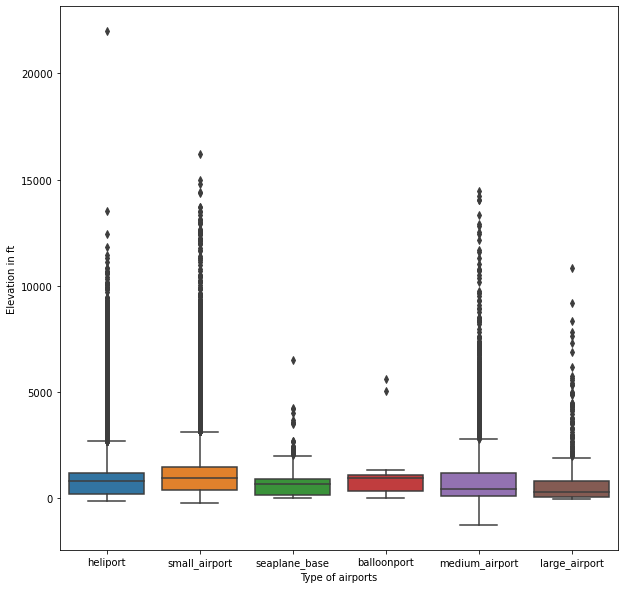

In [305]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'type', y = 'elevation_ft', data=df)
plt.xlabel('Type of airports')
plt.ylabel('Elevation in ft')
plt.show()

There are still few outliers but I identified them as true values. Not fraud

Now lets go back to the state column. We can identify numeric values for the state column and I will remove these columns. 

In [306]:
index_digit = df[df['State'].apply(lambda x: x.isdigit())].index
index_digit

Int64Index([10426, 10427, 10431, 10456, 10459, 10476, 10516, 10738, 10740,
            11561,
            ...
            57409, 57410, 57411, 57412, 57413, 57414, 57415, 57416, 57417,
            57420],
           dtype='int64', length=6167)

In [307]:
df.drop(index_digit, inplace = True)

In [308]:
df['type'].unique()

array(['heliport', 'small_airport', 'seaplane_base', 'balloonport',
       'medium_airport', 'large_airport'], dtype=object)

The data is clean enough with good object types to go to the next step which is EDA. 

# EDA

In [309]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1,len(data)+1)/len(data)
    return x,y

In [310]:
def ecdf_plot_elevation_ft(data):
    plt.figure(figsize=(10,10))
    for i in range(len(mean_df_f)):
        hx,hy = ecdf(df['elevation_ft'][df.type == data.airport[i]])
        plt.plot(hx,hy,marker='.',linestyle='none')
    plt.title('ECDF plot of Elevation (ft) in heliport')
    plt.xlabel('Elevation in feat')
    plt.ylabel('% of heliport')
    plt.legend(data.airport)
    plt.margins(x=0.1)
    plt.show()

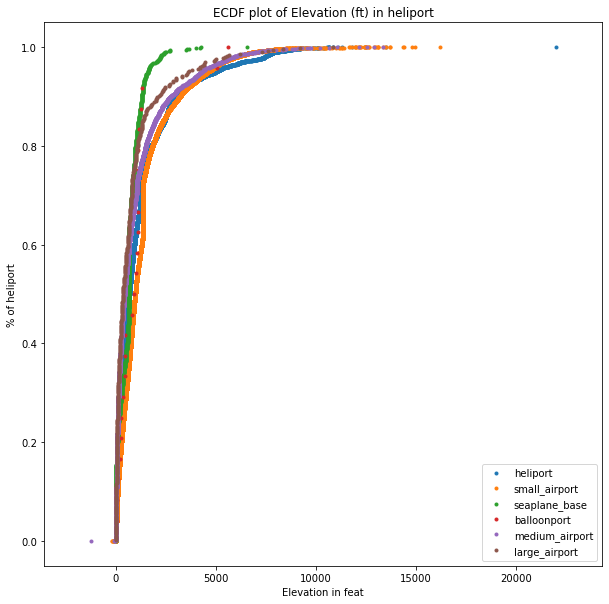

In [311]:
ecdf_plot_elevation_ft(mean_df_f)

So 85% of the airport has all the data points within the elevation feet 5000. 

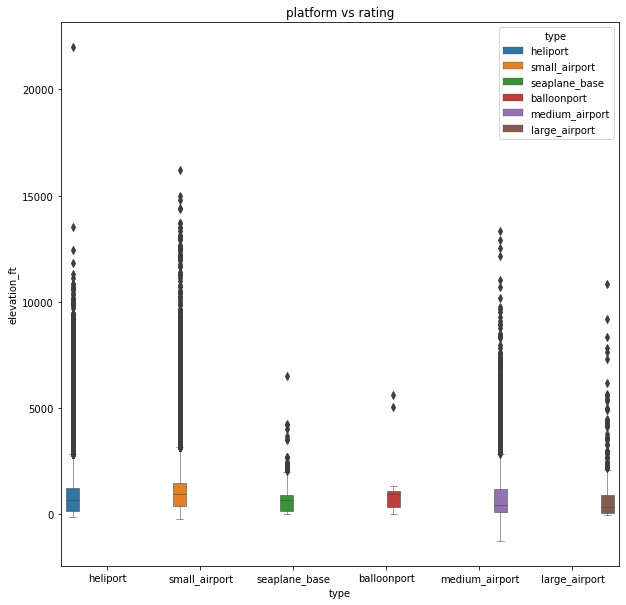

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.boxplot(x='type', y ='elevation_ft', data = df, hue ='type', width = 0.9, linewidth = 0.5)
plt.title('platform vs rating')
plt.show()

How come smaller airport are built in higher elevation feet? Are heliport, seaplane_base, and balloon port considered as small or large airports?

First, I want to see what kind of airports are mostly seen in each continents. We can have multiple assumptions about this. Probably because of the weather? Or is it just because it's hard to build big airports in a higher elevation height?

Both of these assumptions makes sense bet let's dig deeper to know better

In [313]:
df.head()

,type,elevation_ft,continent,Country,State,Longitude,Latitude
0,heliport,11.0,NA,US,PA,-74.933601,40.070801
1,small_airport,3435.0,NA,US,KS,-101.473911,38.704022
2,small_airport,450.0,NA,US,AK,-151.695999,59.949200
3,small_airport,820.0,NA,US,AL,-86.770302,34.864799
5,small_airport,1100.0,NA,US,OK,-97.818019,34.942803


In [314]:
df.groupby(by = ['type','continent'])['continent'].count().sort_values(ascending = False)

type            continent
small_airport   NA           15651
heliport        NA            7110
small_airport   SA            6100
                EU            3923
                OC            2362
                AF            1893
heliport        SA            1622
small_airport   AS            1459
medium_airport  NA            1093
seaplane_base   NA             956
heliport        EU             848
medium_airport  EU             686
                AS             544
                SA             397
                AF             319
                OC             307
heliport        OC             302
                AS             281
large_airport   NA             190
small_airport   A              187
                CA             140
large_airport   EU             111
medium_airport  A               88
large_airport   AS              67
heliport        A               40
large_airport   AF              34
seaplane_base   EU              23
large_airport   SA           

In [315]:
df.groupby(by = ['type','Country'])['Country'].count().sort_values(ascending = False).head(10)

type            Country
small_airport   US         13559
heliport        US          6315
small_airport   BR          3489
                AU          1559
heliport        BR          1243
small_airport   CA          1005
                MX           964
                GB           802
                DE           750
medium_airport  US           687
Name: Country, dtype: int64

In [316]:
df.type.unique()

array(['heliport', 'small_airport', 'seaplane_base', 'balloonport',
       'medium_airport', 'large_airport'], dtype=object)

In [317]:
#Do this for all the airport types and find the mean. and then perform the anova test.
def sample(airport):
    airport_sample = [np.random.choice(df[df['type']== airport]['elevation_ft'], 30).mean() for i in range(1000)]
    return airport_sample

In [318]:
sample_airport_df = pd.DataFrame({'heliport':sample('heliport'),'small_airport': sample('small_airport'),
                                 'seaplane_base':sample('seaplane_base'), 'balloonport':sample('balloonport'), 
                                  'medium_airport':sample('medium_airport'), 'large_airport':sample('large_airport')
})

In [319]:
sample_airport_df

,heliport,small_airport,seaplane_base,balloonport,medium_airport,large_airport
0,1358.758473,1150.493713,676.267143,1204.233333,788.806657,1099.333333
1,1094.912570,1589.960380,575.576599,950.566667,1147.439991,722.833333
2,1292.071043,1910.589326,663.128844,1375.100000,1054.166667,1315.566667
3,1632.333333,1066.927047,580.995511,899.500000,1364.200000,1110.666667
4,940.779237,1420.028946,563.409932,1152.933333,1074.806657,499.266667
...,...,...,...,...,...,...
995,1236.345903,1115.220760,574.909932,1398.166667,1230.000000,656.200000
996,1204.304377,1400.668566,645.886055,1121.800000,664.200000,699.335410
997,1269.925140,1437.327047,563.219388,958.300000,1312.733333,633.633333
998,2173.758473,1302.835233,680.757688,1151.900000,758.700000,482.833333


melt the data to make plots

In [320]:
df_melt = pd.melt(sample_airport_df, var_name='type', value_name='elevation_ft')
df_melt

,type,elevation_ft
0,heliport,1358.758473
1,heliport,1094.912570
2,heliport,1292.071043
3,heliport,1632.333333
4,heliport,940.779237
...,...,...
5995,large_airport,656.200000
5996,large_airport,699.335410
5997,large_airport,633.633333
5998,large_airport,482.833333


<Figure size 720x720 with 0 Axes>

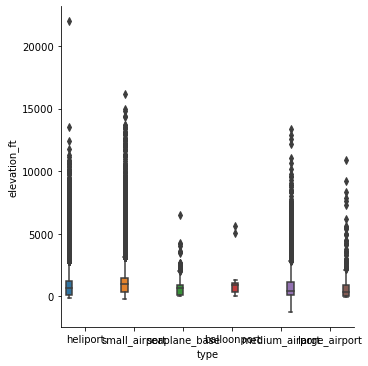

In [321]:
plt.figure(figsize=(10,10))
sns.catplot(x = 'type', y= 'elevation_ft', data = df, hue = 'type', kind = 'box')

I see that balloonport has too less data and since I sampled the data, balloon port has high elevation feet.

Now we will perform a one way ANOVA to prove the mean values have statistical difference between all groups

In [322]:
import scipy.stats as stats

In [323]:
fvalue, pvalue = stats.f_oneway(sample_airport_df['heliport'],sample_airport_df['small_airport'],
                               sample_airport_df['seaplane_base'],sample_airport_df['balloonport'],
                               sample_airport_df['medium_airport'],sample_airport_df['large_airport'])




In [324]:
fvalue, pvalue

(1046.0672299424332, 0.0)

But I want to see how each groups are statistically different from each other.

Equal sample size : Tukey's HSD
Unequal sample size: Yukey's Kramer method

In [325]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_melt['elevation_ft'],
                          groups=df_melt['type'],
                          alpha=0.05)

#display results
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1         group2      meandiff p-adj   lower     upper   reject
------------------------------------------------------------------------
   balloonport       heliport   136.132 0.001  104.4975  167.7665   True
   balloonport  large_airport -239.1721 0.001 -270.8067 -207.5376   True
   balloonport medium_airport  -87.6264 0.001 -119.2609  -55.9919   True
   balloonport  seaplane_base -429.2259 0.001 -460.8605 -397.5914   True
   balloonport  small_airport  272.9228 0.001  241.2883  304.5574   True
      heliport  large_airport -375.3042 0.001 -406.9387 -343.6696   True
      heliport medium_airport -223.7584 0.001 -255.3929 -192.1239   True
      heliport  seaplane_base -565.3579 0.001 -596.9925 -533.7234   True
      heliport  small_airport  136.7908 0.001  105.1563  168.4253   True
 large_airport medium_airport  151.5458 0.001  119.9112  183.1803   True
 large_airport  seaplane_base -190.0538 0.001 -221.

Thus, we would conclude that there is a statistically significant difference between 
the means of all groups.



In [326]:
df.head()

,type,elevation_ft,continent,Country,State,Longitude,Latitude
0,heliport,11.0,NA,US,PA,-74.933601,40.070801
1,small_airport,3435.0,NA,US,KS,-101.473911,38.704022
2,small_airport,450.0,NA,US,AK,-151.695999,59.949200
3,small_airport,820.0,NA,US,AL,-86.770302,34.864799
5,small_airport,1100.0,NA,US,OK,-97.818019,34.942803


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46875 entries, 0 to 57419
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          46875 non-null  object 
 1   elevation_ft  46875 non-null  float64
 2   continent     46875 non-null  object 
 3   Country       46875 non-null  object 
 4   State         46875 non-null  object 
 5   Longitude     46875 non-null  float64
 6   Latitude      46875 non-null  float64
dtypes: float64(3), object(4)
memory usage: 3.9+ MB


In [328]:
def correlation_numeric(type1, type2):
    col1, col2 = type1, type2
    corr = df[type1].corr(df[type2])
    print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

In [329]:
correlation_numeric('elevation_ft', 'Latitude')

Correlation between  elevation_ft  and  Latitude is:  -0.09


In [330]:
correlation_numeric('elevation_ft', 'Longitude')

Correlation between  elevation_ft  and  Longitude is:  -0.03


In [331]:
correlation_numeric('Longitude', 'Latitude')

Correlation between  Longitude  and  Latitude is:  -0.39
